## Spam Emails Identifier using Logistic Regression

Dataset consists of 4601 records with 57 features of email texts, and the nominal attribute if a message was marked as spam or not. It is dataset of emails made by Mark Hopkins, Erik Reeber, George Forman, and Jaap Suermondt from Hewlett-Packard Labs.

Original dataset page https://archive.ics.uci.edu/ml/datasets/Spambase

In [56]:
# Importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

###  Convert data to csv format with column names

In [58]:
# Import Data
data = "./spambase/spambase_data.txt"

# Convert Data to csv format
df = pd.read_csv(data, header=None)

# Save data as a csv file
df.to_csv('spambase_data.csv')

In [37]:
# Include column names to dataframe
column_names = ['word_freq_make', 'word_freq_address', 
            'word_freq_all', 'word_freq_3d', 'word_freq_our',
           'word_freq_over', 'word_freq_remove', 'word_freq_internet',
           'word_freq_order', 'word_freq_mail', 'word_freq_receive',
           'word_freq_will', 'word_freq_people', 'word_freq_report',
           'word_freq_addresses', 'word_freq_free', 'word_freq_business',
           'word_freq_email', 'word_freq_you', 'word_freq_credit',
           'word_freq_your', 'word_freq_font', 'word_freq_000',
           'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
           'word_freq_george', 'word_freq_650', 'word_freq_lab',
           'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
           'word_freq_data', 'word_freq_415', 'word_freq_85',
           'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
           'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
           'word_freq_meeting', 'word_freq_original', 'word_freq_project',
           'word_freq_re', 'word_freq_edu', 'word_freq_table',
           'word_freq_conference', 'char_freq_;', 'char_freq_(',
           'char_freq_[', 'char_freq_!', 'char_freq_$',
           'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
           'capital_run_length_total', 'spam, non-spam classes']

df.columns = column_names


### Read data in Python. Then explore and clean it; Display datatypes, check for missing values, and Imputation.

In [38]:
# Reading data to explore and clean it
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,"spam, non-spam classes"
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [39]:
# Display datatypes
data_types = df.dtypes
print('The datatypes are: \n', data_types)

The datatypes are: 
 word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                

In [40]:
# Checking for missing values
missing_values = df.isnull().sum().sum()
print('Sum of all missing values =', missing_values)

Sum of all missing values = 0


### Since there are no missing values in the given data, there is no need for imputation

In [41]:
# Inspecting the data to know if scaling the features is necessary
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,"spam, non-spam classes"
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


By observing the above summary statistics of the data, some of the features have maximum values that are extremely large compared to the rest of the features, it is therefore important we scale the features in order to get a model that will predict with better accuracy. 

Scaling the features will also ensure that no feature dominates the rest of the features of the data wrongly

In [42]:
# Importing the necessary library for Feature Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))

# After scaling the column names were removed
# Putting back the column names
scaled_df.columns = column_names
scaled_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,"spam, non-spam classes"
0,0.00,0.64,1.523810,0.0,0.842105,0.00,0.00,0.00,0.00,0.0000,...,0.00,-0.345745,0.0,2.469841,0.000000,0.000,0.698772,1.243243,0.792208,1.0
1,0.21,0.28,1.190476,0.0,0.368421,0.28,0.21,0.07,0.00,5.8750,...,0.00,0.356383,0.0,1.180952,3.461538,0.048,1.339943,2.324324,4.038961,1.0
2,0.06,0.00,1.690476,0.0,3.236842,0.19,0.19,0.12,0.64,1.5625,...,0.01,0.414894,0.0,0.876190,3.538462,0.010,3.562323,12.702703,9.367965,1.0
3,0.00,0.00,0.000000,0.0,1.657895,0.00,0.31,0.63,0.31,3.9375,...,0.00,0.382979,0.0,0.434921,0.000000,0.000,0.595373,0.675676,0.415584,1.0
4,0.00,0.00,0.000000,0.0,1.657895,0.00,0.31,0.63,0.31,3.9375,...,0.00,0.372340,0.0,0.428571,0.000000,0.000,0.595373,0.675676,0.415584,1.0


In [43]:
# Summary Statistics of the Scaled Data
scaled_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,"spam, non-spam classes"
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.668229,0.065425,0.821641,0.095901,0.114208,0.105295,0.090067,1.496332,...,0.038575,0.393779,0.016976,0.854193,1.457898,0.044238,1.376542,1.004670,0.815105,0.394045
std,0.305358,1.290575,1.200340,1.395151,1.769770,0.273824,0.391441,0.401071,0.278616,4.029721,...,0.243471,1.438060,0.109394,2.589434,4.728500,0.429342,14.980854,5.267333,2.624882,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.345745,0.000000,0.000000,0.000000,0.000000,-0.602455,-0.378378,-0.406926,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.345745,0.000000,0.000000,0.000000,0.000000,-0.324835,-0.243243,-0.259740,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.654255,0.000000,1.000000,1.000000,0.000000,0.675165,0.756757,0.740260,1.000000
max,4.540000,14.280000,12.142857,42.810000,26.315789,5.880000,7.270000,11.110000,5.260000,113.625000,...,4.385000,51.526596,4.081000,103.104762,115.442308,19.829000,519.463645,269.567568,68.164502,1.000000


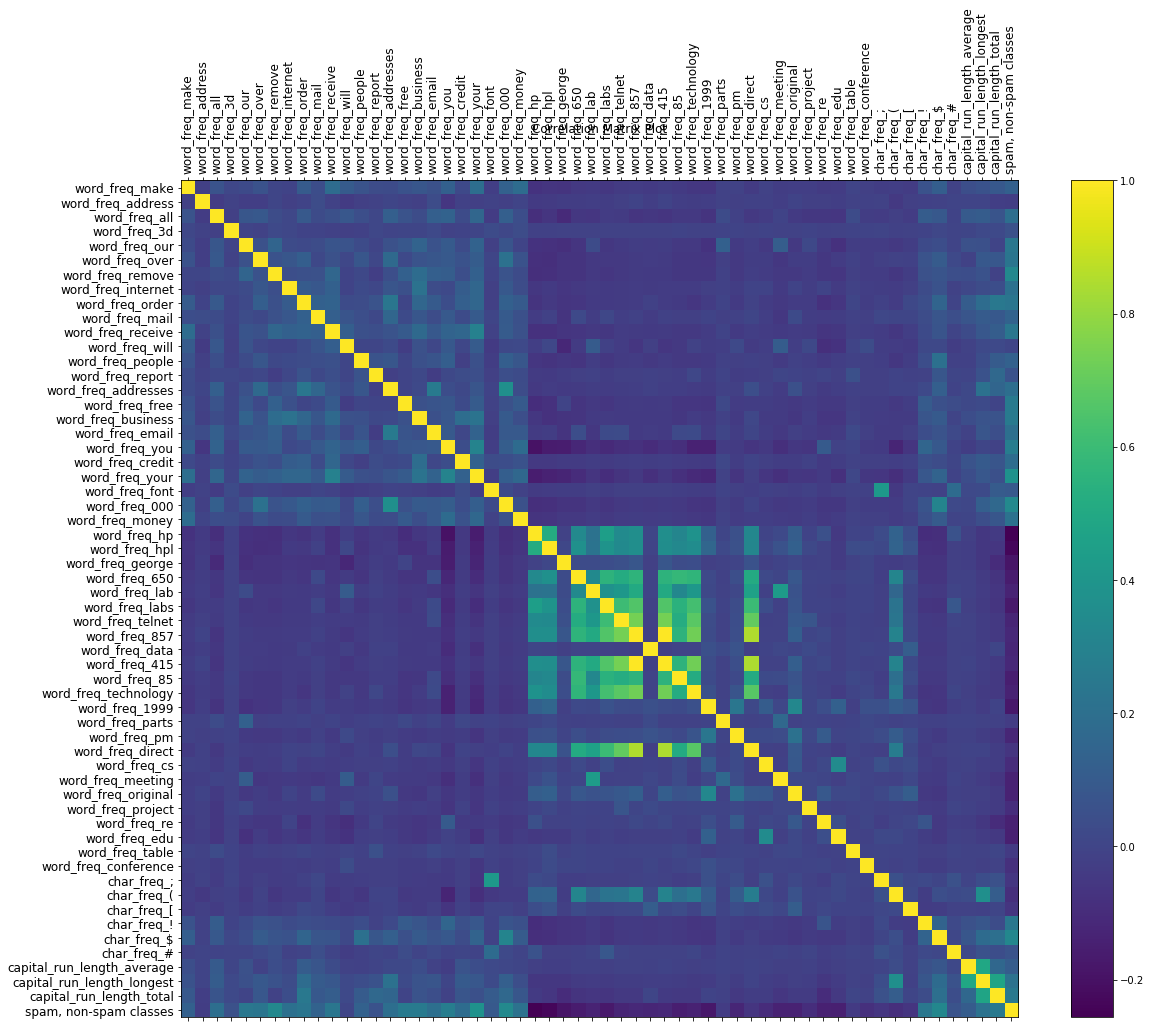

In [44]:
# Getting the correlation matrix plot

f = plt.figure(figsize=(19, 15))
plt.matshow(scaled_df.corr(), fignum=f.number)
plt.title('Correlation Matrix Plot')
plt.xticks(range(scaled_df.shape[1]), scaled_df.columns, fontsize=12, rotation=90)
plt.yticks(range(scaled_df.shape[1]), scaled_df.columns, fontsize=12)
plt.colorbar()
plt.show()

## Split the dataset into train and test in proportion of 80 to 20

In [45]:
# Defining the features of the data
x = scaled_df.iloc[:, 0:57]
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,1.523810,0.0,0.842105,0.00,0.00,0.00,0.00,0.0000,...,0.0,0.00,-0.345745,0.0,2.469841,0.000000,0.000,0.698772,1.243243,0.792208
1,0.21,0.28,1.190476,0.0,0.368421,0.28,0.21,0.07,0.00,5.8750,...,0.0,0.00,0.356383,0.0,1.180952,3.461538,0.048,1.339943,2.324324,4.038961
2,0.06,0.00,1.690476,0.0,3.236842,0.19,0.19,0.12,0.64,1.5625,...,0.0,0.01,0.414894,0.0,0.876190,3.538462,0.010,3.562323,12.702703,9.367965
3,0.00,0.00,0.000000,0.0,1.657895,0.00,0.31,0.63,0.31,3.9375,...,0.0,0.00,0.382979,0.0,0.434921,0.000000,0.000,0.595373,0.675676,0.415584
4,0.00,0.00,0.000000,0.0,1.657895,0.00,0.31,0.63,0.31,3.9375,...,0.0,0.00,0.372340,0.0,0.428571,0.000000,0.000,0.595373,0.675676,0.415584


In [46]:
# Defining the label of the data
y = scaled_df[['spam, non-spam classes']]
y.head()

,"spam, non-spam classes"
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [47]:
# Importing the necessary library for splitting the dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Using GridSearchCV find best hyperparameters for the LogisticRegression model. Try different variations with penalty [’l1’, ’l2’], type of solver: [’liblinear’, ’lbfgs’], and regularization strength: np:logspace(−4; 4; 20).

In [48]:
# Importing the library for logistic regression
from sklearn.linear_model import LogisticRegression

In [49]:
log_param = {'penalty':['l1', 'l2'], 'solver':['liblinear'], 'C': np.logspace(-4, 4, 20)}

log_reg = LogisticRegression(random_state=0)

log_grid = GridSearchCV(estimator=log_reg, param_grid=log_param, scoring='accuracy', cv=10)
log_grid.fit(x_train, np.ravel(y_train))

print('Accuracy =', log_grid.best_score_)
print('Best param =', log_grid.best_params_)

Accuracy = 0.9309782608695653
Best param = {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}


In [50]:
log_param2 = {'penalty':['l2'], 'solver':['lbfgs'], 'C': np.logspace(-4, 4, 20)}

log_reg2 = LogisticRegression(max_iter=5000, random_state=0)

log_grid2 = GridSearchCV(estimator=log_reg2, param_grid=log_param2, scoring='accuracy', cv=10)
log_grid2.fit(x_train, np.ravel(y_train))

print('Accuracy =', log_grid2.best_score_)
print('Best param =', log_grid2.best_params_)

Accuracy = 0.9309782608695653
Best param = {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'lbfgs'}


## Evaluate model on test set and report: accuracy, precision, and recall

In [51]:
# Importing the library for accuracy, precison and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [52]:
y_pred_log = log_grid.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_pred_log))
print('Precision =', precision_score(y_test, y_pred_log))
print('Recall =', recall_score(y_test, y_pred_log))

Accuracy = 0.9077090119435396
Precision = 0.9005376344086021
Recall = 0.8746736292428199


## Regression coefficients and names of the top 5 most influencing features and the top 5 ignored features.

In [53]:
log_reg2 = LogisticRegression(C=4.281332398719396, penalty='l2', solver='liblinear', random_state=0)
log_reg2.fit(x_train, np.ravel(y_train))

coefficients = log_reg2.coef_

print('Coefficients =', coefficients)

Coefficients = [[-0.24386619 -0.14936285  0.0762997   1.40766806  0.23274904  0.66870875
   2.40514509  0.50843858  0.66579551  0.01308054  0.193532   -0.0982475
  -0.05898645  0.13642356  1.00345759  0.08806572  0.78622665 -0.04880123
   0.24002815  0.93415406  0.35109694  0.21640921  1.99189936  0.43045788
  -1.81245824 -1.42442367 -8.31364958  0.66515311 -1.68771434 -0.64799918
  -0.1402773   0.7156171  -0.96181154  0.45853193 -2.75596684  1.08820835
   0.12344434  0.61018286 -0.77925414 -0.32750447 -2.97881326 -2.48744586
  -1.04232851 -1.4689412  -0.0820666  -1.8271358  -1.5212274  -3.37946831
  -1.28663026 -0.05687226 -0.77865197  0.07537604  0.28349191  2.12821906
  -0.01266988  0.33346202  0.19385449]]


In [54]:
# Sort the list in ascending order
sorted_coefficients = np.sort(coefficients)
sorted_coefficients

array([[-8.31364958, -3.37946831, -2.97881326, -2.75596684, -2.48744586,
        -1.8271358 , -1.81245824, -1.68771434, -1.5212274 , -1.4689412 ,
        -1.42442367, -1.28663026, -1.04232851, -0.96181154, -0.77925414,
        -0.77865197, -0.64799918, -0.32750447, -0.24386619, -0.14936285,
        -0.1402773 , -0.0982475 , -0.0820666 , -0.05898645, -0.05687226,
        -0.04880123, -0.01266988,  0.01308054,  0.07537604,  0.0762997 ,
         0.08806572,  0.12344434,  0.13642356,  0.193532  ,  0.19385449,
         0.21640921,  0.23274904,  0.24002815,  0.28349191,  0.33346202,
         0.35109694,  0.43045788,  0.45853193,  0.50843858,  0.61018286,
         0.66515311,  0.66579551,  0.66870875,  0.7156171 ,  0.78622665,
         0.93415406,  1.00345759,  1.08820835,  1.40766806,  1.99189936,
         2.12821906,  2.40514509]])

In [55]:
# Getting the index of the coefficients sorted in ascending order
# This returns the index of the columns
sorted_column_index = np.argsort(coefficients)
sorted_column_index

array([[26, 47, 40, 34, 41, 45, 24, 28, 46, 43, 25, 48, 42, 32, 38, 50,
        29, 39,  0,  1, 30, 11, 44, 12, 49, 17, 54,  9, 51,  2, 15, 36,
        13, 10, 56, 21,  4, 18, 52, 55, 20, 23, 33,  7, 37, 27,  8,  5,
        31, 16, 19, 14, 35,  3, 22, 53,  6]], dtype=int64)

### top 5 most influencing features : columns 6, 53, 22, 3, and 35

Their names are: 

word_freq_remove - column 6 

char_freq_# - column 53 

word_freq_000 - column 22

word_freq_3d - column 3

word_freq_technology - column 35

##  top 5 ignored features: columns 26, 47, 40, 34, 41

Their names are:

word_freq_george (column 26)

word_freq_conference (column 47)

word_freq_cs (column 40)

word_freq_85 (column 34)

word_freq_meeting(column 41)